In [1]:
#importing all required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Data_Train_food.xlsx')
df.head(4)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes


In [3]:
df.shape

(11094, 9)

In [4]:
df.isna().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [5]:
df.drop(columns = ['Restaurant','Location','Cuisines'],inplace = True)

In [6]:
df.head(3)

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,₹200,₹50,3.5,12,4,30 minutes
1,₹100,₹50,3.5,11,4,30 minutes
2,₹150,₹50,3.6,99,30,65 minutes


### Key Observations :
1. The Location and Cuisine column contains multiple values separated by commas.
2. The Average_Cost and Minimum Order column consist of symbols and are strings.
3. The Rating, Votes and Reviews column consists of invalid values such as ‘-’, “NEW’ etc.

In [7]:
import re
import numpy as np
def impute_avg_cost(avg_cost):
    cost = re.search('[0-9]+',avg_cost)
    if cost:
        res = cost.group(0)
        return pd.to_numeric(res)
    else:
        return np.nan

In [8]:
df['Average_Cost'] = df['Average_Cost'].apply(impute_avg_cost)

In [9]:
df['Average_Cost'].isna().sum()

1

In [10]:
avg_cost_mean = df['Average_Cost'].mean()

In [11]:
df['Average_Cost'].fillna(avg_cost_mean,inplace = True)

In [12]:
def impute_min_order(min_order):
    order = re.search('[0-9]+',min_order)
    if order:
        res = order.group(0)
        return pd.to_numeric(res)
    else:
        return np.nan

In [13]:
df['Minimum_Order'] = df['Minimum_Order'].apply(impute_min_order)

In [14]:
df['Rating'].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [15]:
df['Rating'].replace('-',np.nan,inplace = True)
df['Rating'].replace('NEW',np.nan,inplace = True)
df['Rating'].replace('Opening Soon',np.nan,inplace = True)
df['Rating'].replace('Temporarily Closed',np.nan,inplace = True)

In [16]:
df['Rating'] = pd.to_numeric(df['Rating'],errors = 'ignore')

In [17]:
avg_rating = df['Rating'].mean()
df.fillna(np.around(avg_rating,1),inplace = True)

In [18]:
#Votes Column
df['Votes'].replace('-',np.nan,inplace = True)
df['Votes'] = pd.to_numeric(df['Votes'],errors = 'ignore')
avg_vote = df['Votes'].mean()
df['Votes'].fillna(avg_vote,inplace = True)

In [19]:
#Review Column
df['Reviews'].replace('-',np.nan,inplace = True)
df['Reviews'] = pd.to_numeric(df['Reviews'],errors = 'ignore')
avg_review = df['Reviews'].mean()
df['Reviews'].fillna(avg_review,inplace = True)

In [20]:
#Delivery Column
def impute_delivery_time(dtime):
    delivertime = re.search('[0-9]+',dtime)
    if delivertime:
        res = delivertime.group(0)
        return res
#         return pd.to_numeric(res)
    else:
        return np.nan

In [21]:
df['Delivery_Time'] = df['Delivery_Time'].apply(impute_delivery_time)

In [22]:
df.isna().sum()

Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [23]:
df.head(3)

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,200.0,50,3.5,12.0,4.0,30
1,100.0,50,3.5,11.0,4.0,30
2,150.0,50,3.6,99.0,30.0,65


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Cost   11094 non-null  float64
 1   Minimum_Order  11094 non-null  int64  
 2   Rating         11094 non-null  float64
 3   Votes          11094 non-null  float64
 4   Reviews        11094 non-null  float64
 5   Delivery_Time  11094 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 476.8+ KB


Feature Engineering

### Average Cost Feature

<AxesSubplot:xlabel='Average_Cost', ylabel='Density'>

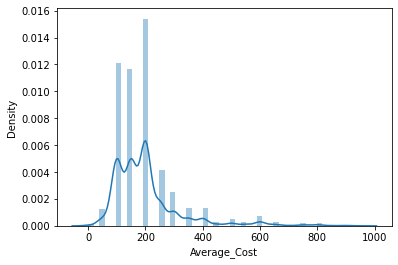

In [25]:
sns.distplot(df['Average_Cost'])

<AxesSubplot:>

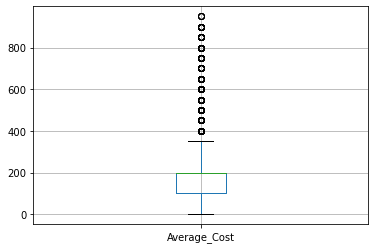

In [26]:
df.boxplot(column = 'Average_Cost')

In [27]:
df['Average_Cost'].describe()

count    11094.000000
mean       200.250158
std        122.243088
min          1.000000
25%        100.000000
50%        200.000000
75%        200.000000
max        950.000000
Name: Average_Cost, dtype: float64

Note: The distribution is rightly skeweed

In [28]:
# calculate IQR for Average Cost
IQR = df['Average_Cost'].quantile(0.75) - df['Average_Cost'].quantile(0.25)
IQR

100.0

In [29]:
lower_bridge = df['Average_Cost'].quantile(0.25) - (IQR * 3)
upper_bridge = df['Average_Cost'].quantile(0.75) + (IQR * 3)
print('Lower Bridge is {}'.format(lower_bridge))
print('Upper Bridge is {}'.format(upper_bridge))

Lower Bridge is -200.0
Upper Bridge is 500.0


Note: Any Data point(Average_Cost) above 500 will be treated as an Outlier

### Minimum Order Feature

<AxesSubplot:xlabel='Minimum_Order', ylabel='Density'>

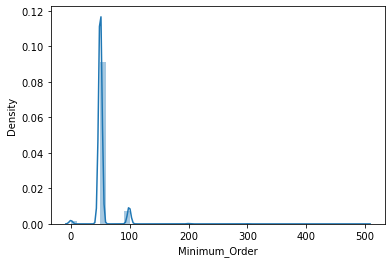

In [30]:
sns.distplot(df['Minimum_Order'])

<AxesSubplot:>

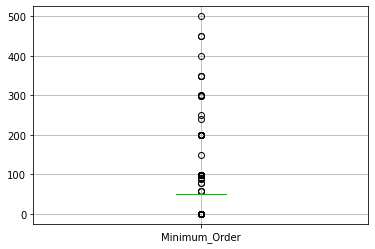

In [31]:
df.boxplot(column = 'Minimum_Order')

In [32]:
df['Minimum_Order'].describe()

count    11094.000000
mean        53.344511
std         18.551245
min          0.000000
25%         50.000000
50%         50.000000
75%         50.000000
max        500.000000
Name: Minimum_Order, dtype: float64

In [33]:
# calculate IQR for Minimum Cost
IQR = df['Minimum_Order'].quantile(0.75) - df['Minimum_Order'].quantile(0.25)
IQR

0.0

In [34]:
lower_bridge = df['Minimum_Order'].quantile(0.25) - (IQR * 3)
upper_bridge = df['Minimum_Order'].quantile(0.75) + (IQR * 3)
print('Lower Bridge is {}'.format(lower_bridge))
print('Upper Bridge is {}'.format(upper_bridge))

Lower Bridge is 50.0
Upper Bridge is 50.0


<AxesSubplot:>

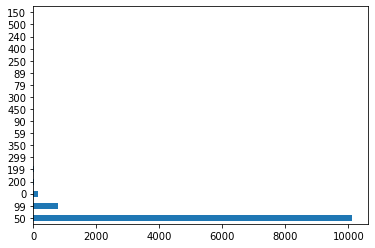

In [35]:
df['Minimum_Order'].value_counts().plot(kind = 'barh')

Note:
    We will only take Minimum Order price only 0,50,99,199 and 200

### Rating Feature

<AxesSubplot:xlabel='Rating', ylabel='Density'>

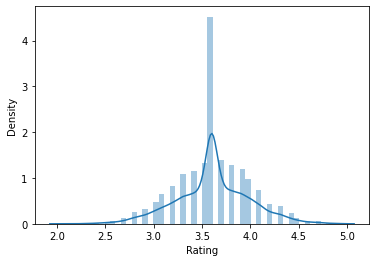

In [36]:
sns.distplot(df['Rating'])

<AxesSubplot:>

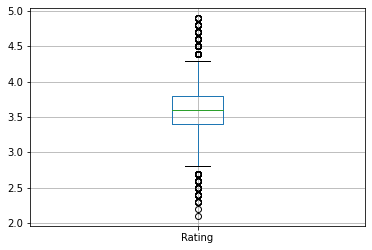

In [37]:
df.boxplot(column = 'Rating')

In [38]:
df['Rating'].describe()

count    11094.000000
mean         3.611078
std          0.375931
min          2.100000
25%          3.400000
50%          3.600000
75%          3.800000
max          4.900000
Name: Rating, dtype: float64

In [39]:
upper_boundary = df['Rating'].mean() + (3 * df['Rating'].std())
lower_boundary = df['Rating'].mean() - (3 * df['Rating'].std())
print('Lower Boundary is {}'.format(lower_boundary))
print('Upper Boundary is {}'.format(upper_boundary))

Lower Boundary is 2.4832850317356643
Upper Boundary is 4.738871088689791


<AxesSubplot:>

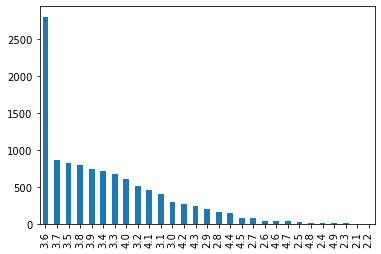

In [40]:
df['Rating'].value_counts().plot(kind = 'bar')

### Votes Feature

<AxesSubplot:xlabel='Votes', ylabel='Density'>

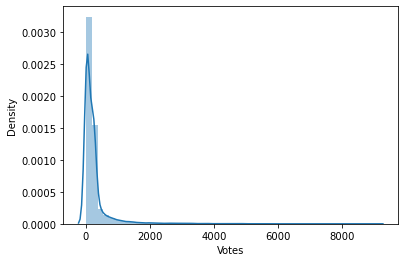

In [41]:
sns.distplot(df['Votes'])

<AxesSubplot:>

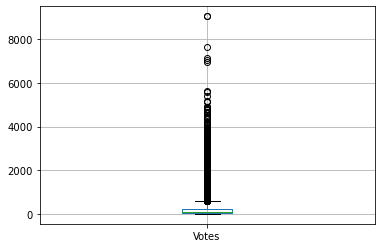

In [42]:
df.boxplot(column = 'Votes')

In [43]:
df['Votes'].describe()

count    11094.000000
mean       244.544457
std        500.520412
min          3.000000
25%         26.000000
50%        106.000000
75%        244.544457
max       9054.000000
Name: Votes, dtype: float64

Note:
    The distribution is rightly skweed

In [44]:
# calculate IQR for Votes Cost
IQR = df['Votes'].quantile(0.75) - df['Votes'].quantile(0.25)
IQR

218.54445676274943

In [45]:
lower_bridge = df['Votes'].quantile(0.25) - (IQR * 3)
upper_bridge = df['Votes'].quantile(0.75) + (IQR * 3)
print('Lower Bridge is {}'.format(lower_bridge))
print('Upper Bridge is {}'.format(upper_bridge))

Lower Bridge is -629.6333702882483
Upper Bridge is 900.1778270509977


In [46]:
df[df['Votes'] > 900].shape

(571, 6)

Note:
    Any data point (Votes) above 900 will be treated as an outlier

### Reviews Feature

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

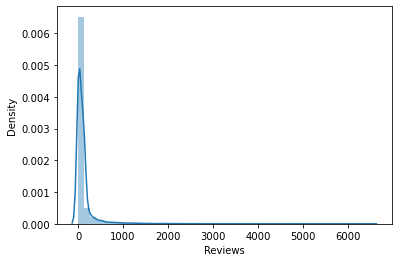

In [47]:
sns.distplot(df['Reviews'])

<AxesSubplot:>

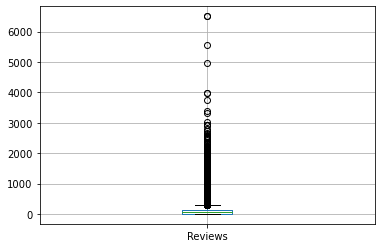

In [48]:
df.boxplot(column = 'Reviews')

In [49]:
df['Reviews'].describe()

count    11094.000000
mean       123.247893
std        285.618694
min          1.000000
25%         11.000000
50%         48.000000
75%        123.247893
max       6504.000000
Name: Reviews, dtype: float64

In [50]:
# calculate IQR for Reviews Cost
IQR = df['Reviews'].quantile(0.75) - df['Reviews'].quantile(0.25)
IQR

112.24789341835573

In [51]:
lower_bridge = df['Reviews'].quantile(0.25) - (IQR * 3)
upper_bridge = df['Reviews'].quantile(0.75) + (IQR * 3)
print('Lower Bridge is {}'.format(lower_bridge))
print('Upper Bridge is {}'.format(upper_bridge))

Lower Bridge is -325.7436802550672
Upper Bridge is 459.9915736734229


In [52]:
df[df['Reviews'] > 460].shape

(556, 6)

Note: Any data points( Reviews) greater than 460 will be treated as an outlier

In [53]:
df.columns

Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews',
       'Delivery_Time'],
      dtype='object')

## Outlier Findings:
1. Average_cost :  Any Data point above 500 will be treated as an Outlier
2. Minimum_Order : We will only take Minimum Order price 0,50,99,199 and 200
3. Rating : Data is normally distributed no outliers
4. Votes : Any data point above 900 will be treated as an outlier
5. Reviews :  Any data points greater than 460 will be treated as an outlier

### Removing Outliers:
    

In [54]:
df.columns

Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews',
       'Delivery_Time'],
      dtype='object')

In [55]:
df2 = df[(df['Average_Cost'] <= 500) & (df['Minimum_Order'].isin([0,50,99,200])) & (df['Votes'] <= 900) & (df['Reviews'] <= 460)]

In [56]:
df2.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,200.0,50,3.5,12.0,4.0,30
1,100.0,50,3.5,11.0,4.0,30
2,150.0,50,3.6,99.0,30.0,65
3,250.0,99,3.7,176.0,95.0,30
4,200.0,99,3.2,521.0,235.0,65


### Check whether dataset is imbalanced

In [57]:
df2['Delivery_Time'].unique()

array(['30', '65', '45', '10', '20', '120', '80'], dtype=object)

<AxesSubplot:>

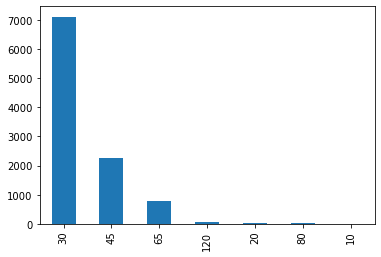

In [58]:
df2['Delivery_Time'].value_counts().plot(kind = 'bar')

Note:
    As you can see the dataset is Imbalanced

!pip3 install imblearn

In [59]:
x = df2.drop(columns = ['Delivery_Time'])
y = df2[['Delivery_Time']]

In [60]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state= 42)

In [61]:
x_res, y_res = os.fit_resample(x,y)

In [62]:
df3 = x_res.copy()

In [63]:
df3.shape

(49861, 5)

In [64]:
df3.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,200.0,50,3.5,12.0,4.0
1,100.0,50,3.5,11.0,4.0
2,150.0,50,3.6,99.0,30.0
3,250.0,99,3.7,176.0,95.0
4,200.0,99,3.2,521.0,235.0


In [65]:
df3['target'] = y_res

In [66]:
df3.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,target
0,200.0,50,3.5,12.0,4.0,30
1,100.0,50,3.5,11.0,4.0,30
2,150.0,50,3.6,99.0,30.0,65
3,250.0,99,3.7,176.0,95.0,30
4,200.0,99,3.2,521.0,235.0,65


<AxesSubplot:ylabel='target'>

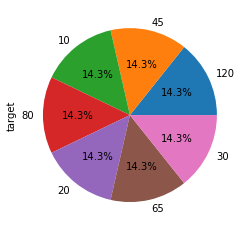

In [67]:
df3['target'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

Note:
    The dataset is balanced now

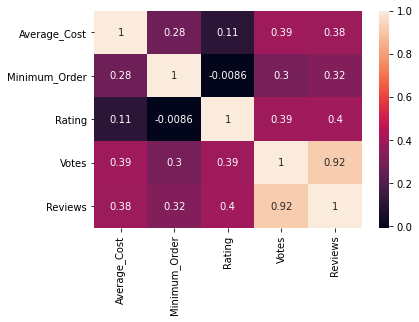

In [68]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax = sns.heatmap(df3.corr(),annot = True)

Note:
    Reviews and Votes are highly correlated, so we will remove votes

<AxesSubplot:xlabel='Average_Cost', ylabel='target'>

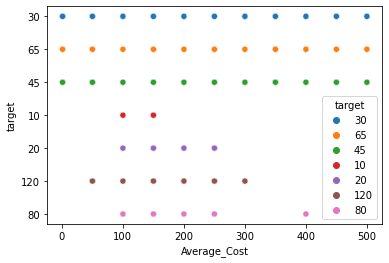

In [69]:
sns.scatterplot(data=df3, x="Average_Cost", y="target", hue="target")

<AxesSubplot:xlabel='Minimum_Order', ylabel='target'>

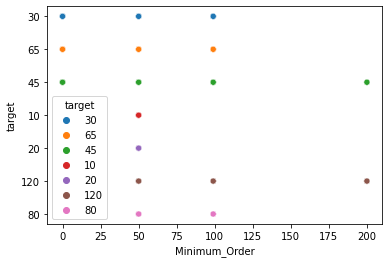

In [70]:
sns.scatterplot(data=df3, x="Minimum_Order", y="target", hue="target")

### Model Training

In [71]:
x = df3.drop(columns = 'target')
y = df3[['target']]

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [73]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth = 25)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25, random_state=0)

In [74]:
y_pred = clf.predict(x_test)

In [75]:
y_test.head()

,target
41453,65
2006,30
45164,80
18743,120
47633,80


In [76]:
y_pred[:5]

array(['65', '30', '80', '10', '80'], dtype=object)

### Model Score

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9257981710251885

In [88]:
clf.score(x_train,y_train)

0.9552079154967241